***(i) Summarize the main characteristics of the dataset like generating descriptive statistics that summarize the central tendency, dispersion and shape of the dataset***

**1. Data Calling**

In [7]:
import pandas as pd

In [8]:
Df1 = pd.read_csv("HR_Dataset - CW1.csv")
Df1.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

---

**2. Data Cleaning**

In [12]:
Df1.columns = Df1.columns.str.capitalize()
Df1 = Df1.rename(columns={'Sales':'Department'})
Df1.head()

Satisfaction_level  Last_evaluation  Number_project  Average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   Time_spend_company  Work_accident  Left  Promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   Salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [13]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Satisfaction_level     14999 non-null  float64
 1   Last_evaluation        14999 non-null  float64
 2   Number_project         14999 non-null  int64  
 3   Average_montly_hours   14999 non-null  int64  
 4   Time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   Left                   14999 non-null  int64  
 7   Promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   Salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
#Identifying numeric variables

numeric = Df1.select_dtypes(include='number')
numeric_cols = [col for col in numeric.columns if Df1[col].nunique()>2]
Df1_Continuous = Df1[numeric_cols]

In [15]:
#Identifying categorical variables

binary_cols = [col for col in Df1.select_dtypes(include='number').columns if Df1[col].nunique()==2]
Df1[binary_cols] = Df1[binary_cols].applymap(lambda x: 'Yes' if x == 1 else 'No')
Df1_Categorical = Df1.select_dtypes(include='object')

C:\Users\Hp\AppData\Local\Temp\ipykernel_2832\3549241683.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Df1[binary_cols] = Df1[binary_cols].applymap(lambda x: 'Yes' if x == 1 else 'No')


---

**3. Data Analysis**

In [18]:
Df1_Continuous.describe()

Satisfaction_level  Last_evaluation  Number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       Average_montly_hours  Time_spend_company  
count          14999.000000        14999.000000  
mean             201.050337            3.498233  
std               49.943099            1.460136  
min               96.000000            2.000000  
25%              156.000000            3.000000  
50%              200.000000            3.000000  
75%              245.000000            4.000000  
max              310.000000           10.000000

In [19]:
Df1_Categorical.value_counts()

Work_accident  Left  Promotion_last_5years  Department  Salary
No             No    No                     sales       medium    1161
                                                        low       1149
                                            technical   low        816
                                                        medium     694
               Yes   No                     sales       low        670
                                                                  ... 
Yes            No    Yes                    hr          low          1
                                            management  medium       1
                                            marketing   high         1
                                            sales       high         1
               Yes   Yes                    sales       medium       1
Name: count, Length: 158, dtype: int64

In [20]:
for col in Df1_Categorical.columns:
    print(f"\nSummary for '{col}':")

    counts = Df1_Categorical[col].value_counts()
    percents = Df1_Categorical[col].value_counts(normalize=True)*100

    Summary_Df1_Cat = pd.DataFrame({
        'Count':counts,
        'Percent':percents.map('{:.2f}%'.format)
    })
    
    print(Summary_Df1_Cat)


Summary for 'Work_accident':
               Count Percent
Work_accident               
No             12830  85.54%
Yes             2169  14.46%

Summary for 'Left':
      Count Percent
Left               
No    11428  76.19%
Yes    3571  23.81%

Summary for 'Promotion_last_5years':
                       Count Percent
Promotion_last_5years               
No                     14680  97.87%
Yes                      319   2.13%

Summary for 'Department':
             Count Percent
Department                
sales         4140  27.60%
technical     2720  18.13%
support       2229  14.86%
IT            1227   8.18%
product_mng    902   6.01%
marketing      858   5.72%
RandD          787   5.25%
accounting     767   5.11%
hr             739   4.93%
management     630   4.20%

Summary for 'Salary':
        Count Percent
Salary               
low      7316  48.78%
medium   6446  42.98%
high     1237   8.25%


In [21]:
Shape = pd.DataFrame({
    'Skeweness':Df1.skew(numeric_only=True),
    'Kurtosis':Df1.kurt(numeric_only=True)
})
Shape

Skeweness  Kurtosis
Satisfaction_level    -0.476360 -0.670859
Last_evaluation       -0.026622 -1.239040
Number_project         0.337706 -0.495478
Average_montly_hours   0.052842 -1.134982
Time_spend_company     1.853319  4.773211

---

***(ii) 
A boxplot is a way of summarizing a set of data measured on an interval scale. Apply the most appropriate visualisation tool to understand the distribution of each variable and interpret the results***.

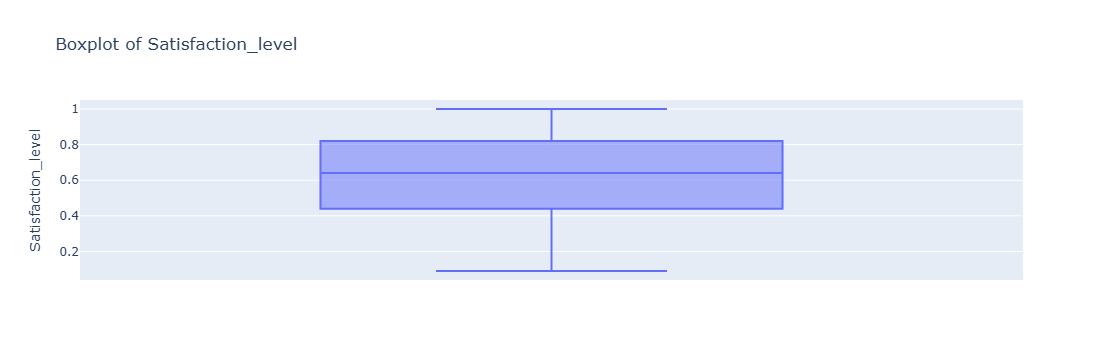

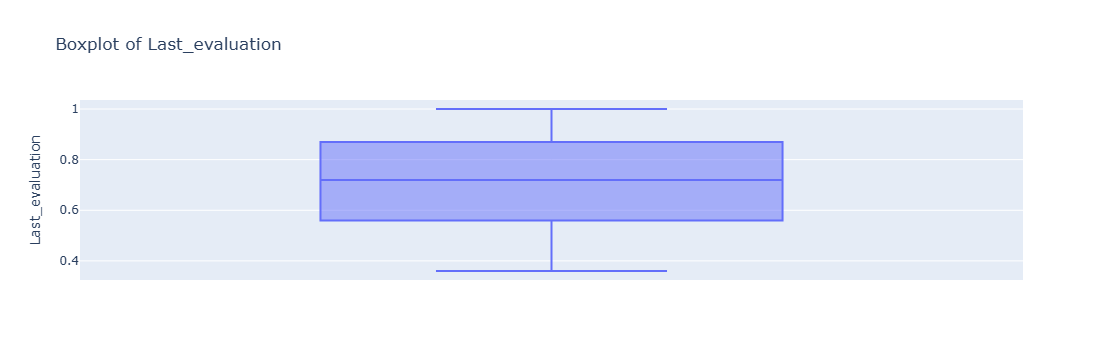

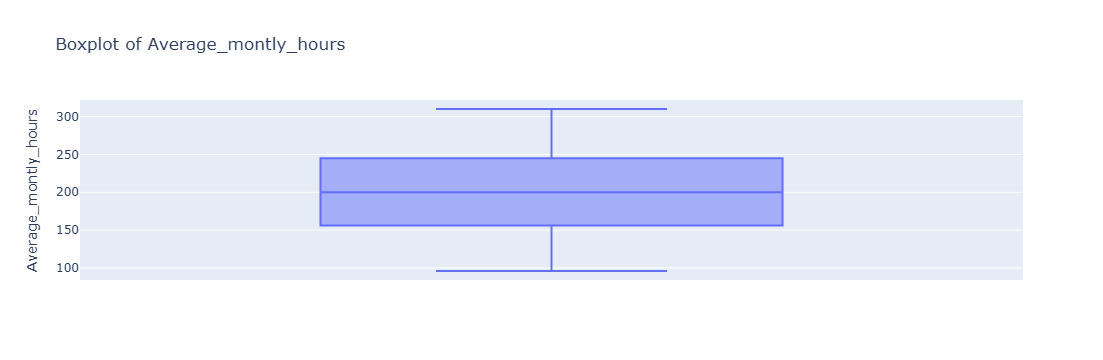

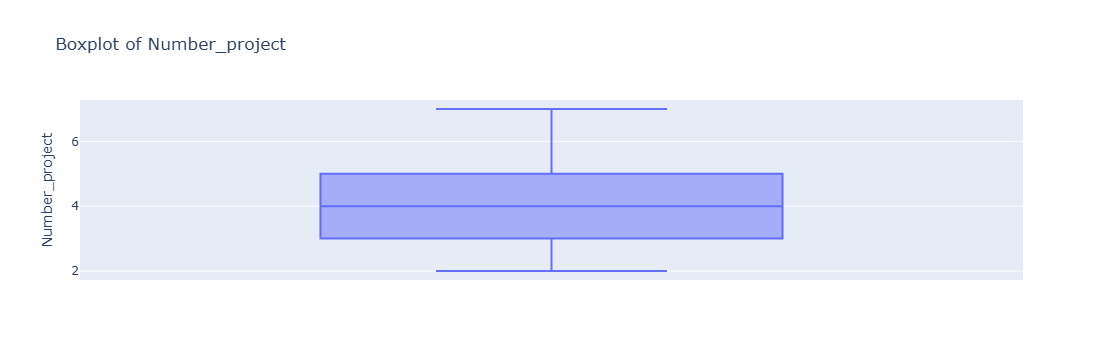

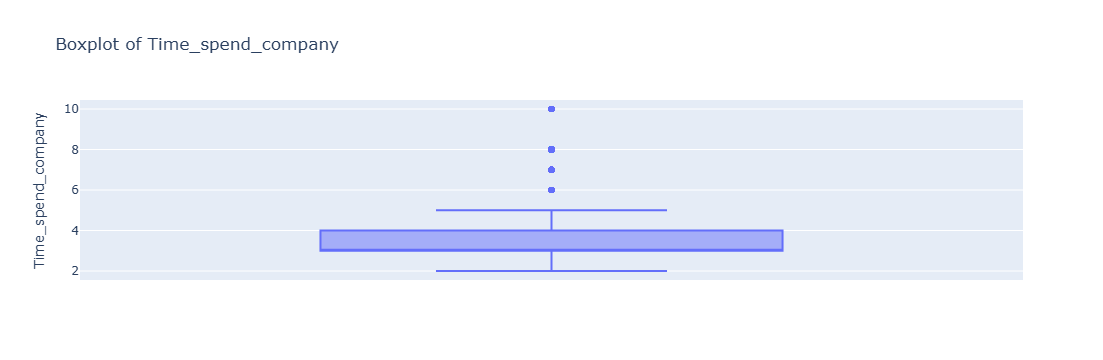

In [52]:
import plotly.express as px

numeric_cols = ['Satisfaction_level', 'Last_evaluation', 'Average_montly_hours','Number_project', 'Time_spend_company']

for col in numeric_cols:
    fig = px.box(Df1,y=col,title=f"Boxplot of {col}")
    fig.show()

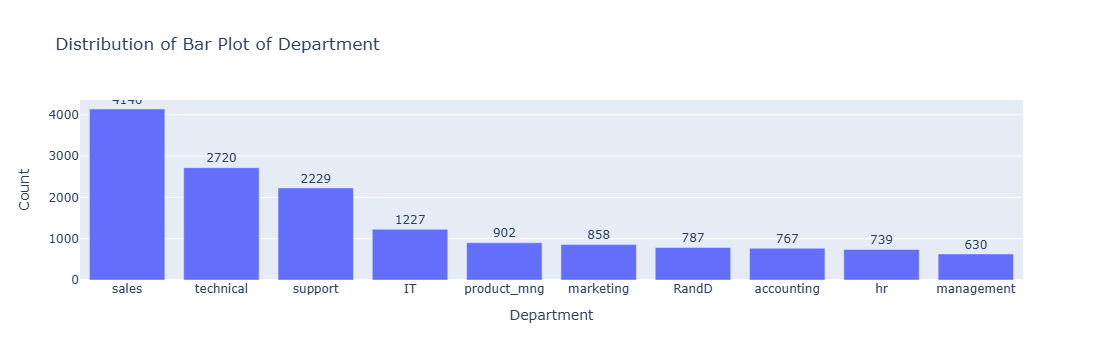

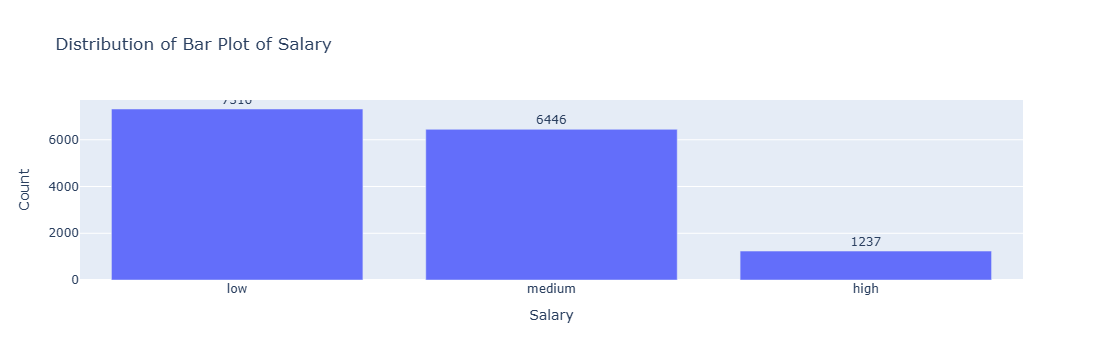

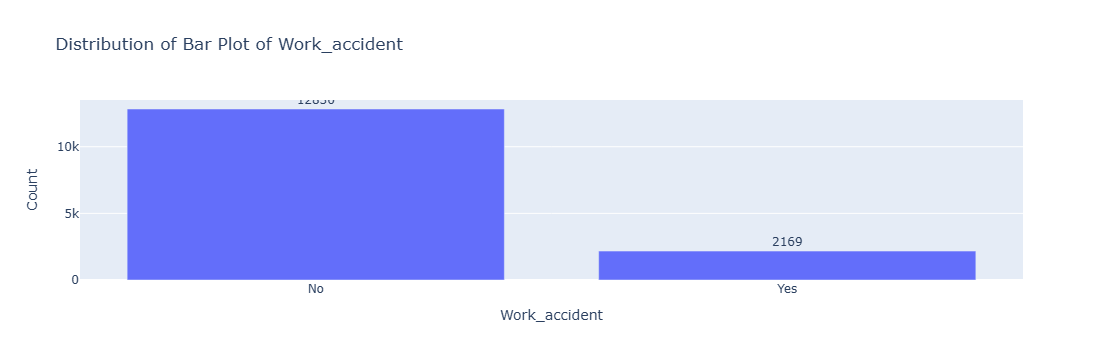

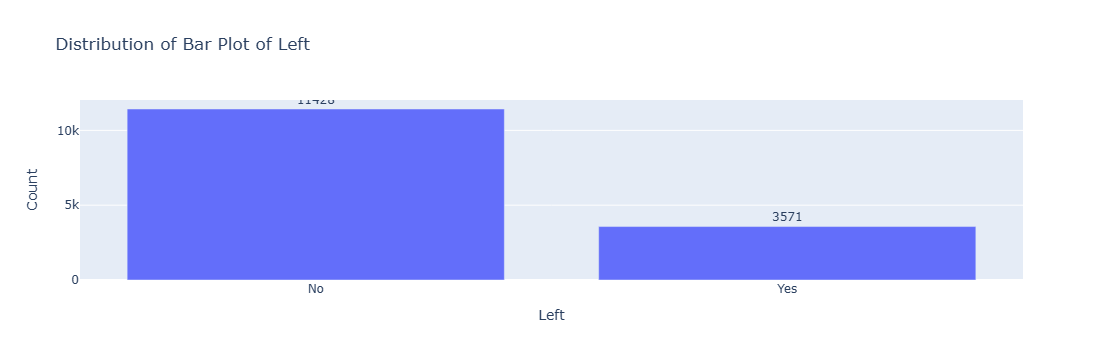

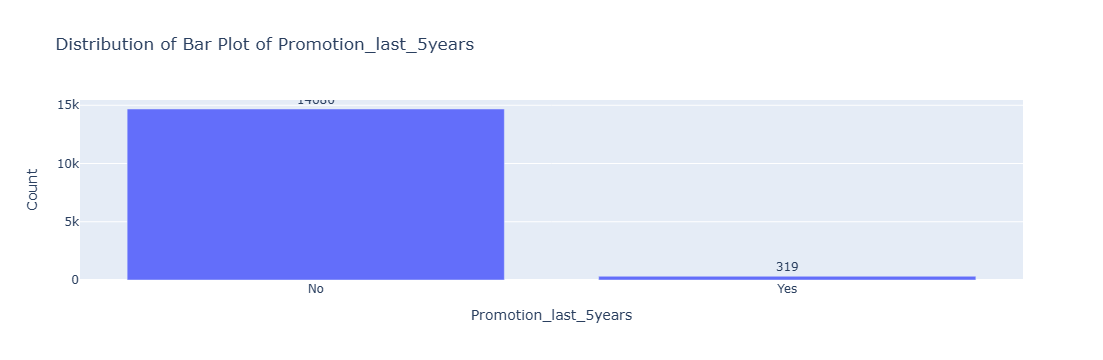

In [63]:
binary_cols = ['Department', 'Salary', 'Work_accident', 'Left', 'Promotion_last_5years']

for col in binary_cols:
    bin_counts = Df1[col].value_counts().reset_index()
    bin_counts.columns = [col, 'Count']
    fig = px.bar(bin_counts, x=col, y='Count', title=f"Distribution of Bar Plot of {col}",text='Count')
    fig.update_traces(textposition='outside')
    fig.show()

---

**Interpretation**

_**1.** The **satisfaction_level** variable has a mean of 0.61 and negative skewness, indicating most employees have high satisfaction while there are few employees with outliers on the lower end. The kurtosis is slightly negative, suggesting a flatter distribution compared to a normal bell curve._
an higher income._

_**2.** The **Last_evaluation** variable has a mean of 0.72 and negative skewness which means majority of the employees have been evaluated 8 and 1/2 months(0.72 years) ago and since skewness is around -0.0266 the distribution has  a negative skewness but skewness is very much closer to 0. So, the distribution is almost symmetric with a slight negative skewness and it has a fewer outlier values since kurtosis is -1.2390 and have a flatter distribution compared to normal bell curve._


_**3.** The **Number_project** variable has a mean of approximately 3.8, and a slightly positive skewness of 0.34, indicating that most employees completed around 3 to 4 projects, with a small number of employees completing a higher number of projects.The negative kurtosis value (–0.49) suggests the distribution is flatter than a normal curve, meaning the values are more evenly spread with fewer extreme outliers._

_**4.** The **Average_montly_hours** variable has a mean of 201.05 and a very slight positive skewness (0.05), indicating that the distribution is nearly symmetric, with most employees working around 200 hours per month.The negative kurtosis (–1.13) shows that the distribution is flatter than a normal curve, meaning values are more spread out and there are fewer extreme cases of extremely low or high work hours._

_**5.** The **Time_spend_company** variable has a mean of 3.49 years and a strong positive skewness (1.85), indicating that most employees have been with the company for 3 to 4 years, while a few employees have much longer tenures.The high kurtosis value (4.77) suggests the distribution is highly peaked and heavy-tailed, meaning that the data is concentrated around the mean, but there are significant outliers (employees who have stayed for many years longer than most)._

_**6.** The **Work_accident** variable indicates that the majority of employees (85.54%) have not experienced a work accident, while only 14.46% have experienced._

_**7.** The **Left** variable shows that majority of the employees (76.19%) have not left the workplace while 23.81% of them have left the company._

_**8.** The **Promotion_last_5years** variable indicated that the majority of the employees (97.87%) in the company have not been able get a promotion during the past 5 years while only 2.13% of the employees have been abled._

_**9.** The **Department** variable indicates that majority (27.60%) of the employees are working in the sales department while least amount(4.20%) of employees are working in the management department. Further it seems that there is a high demand and intake in the Sales, Technical, Support and IT departments._

_**10.** The **Salary** variable shows that majority of the employees(48.78%) in the company have a low salary but there is no much difference between those who getting low and medium income while only few of the employees get an higher income._

***(iii) 
Apply bivariate analysis for all the variables ( Eg. Correlation matrix) and visualise the bivariate analysis***.

**1. Bivariate analysis between Numeric Vs Numeric**

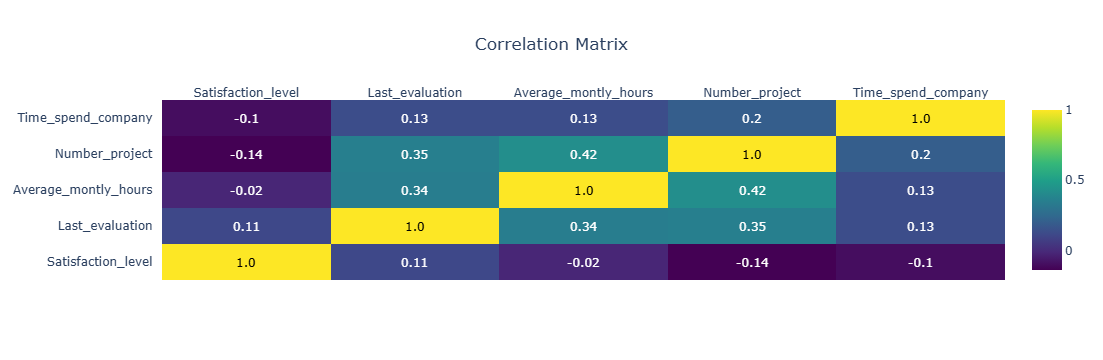

In [77]:
import plotly.figure_factory as ff

corr_matrix = Df1[numeric_cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values.round(2),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    colorscale='viridis',
    showscale=True
)

fig.update_layout(title_text='Correlation Matrix', title_x=0.5)
fig.show()

**2. Bivariate analysis between Categorical Vs Numeric**

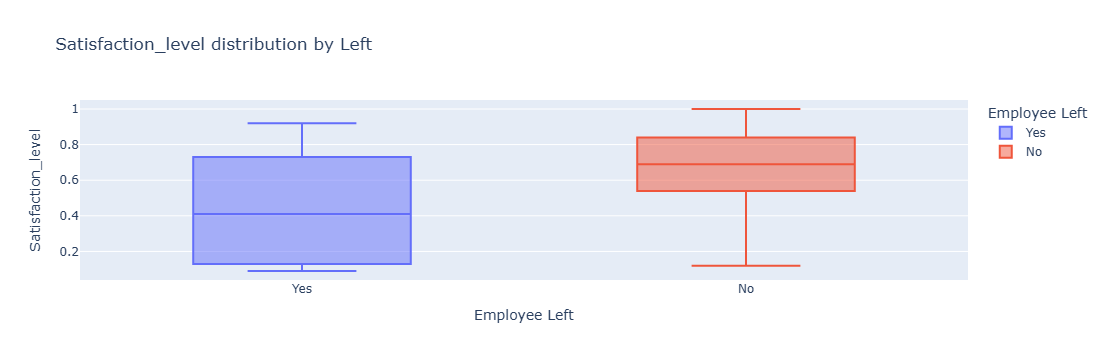

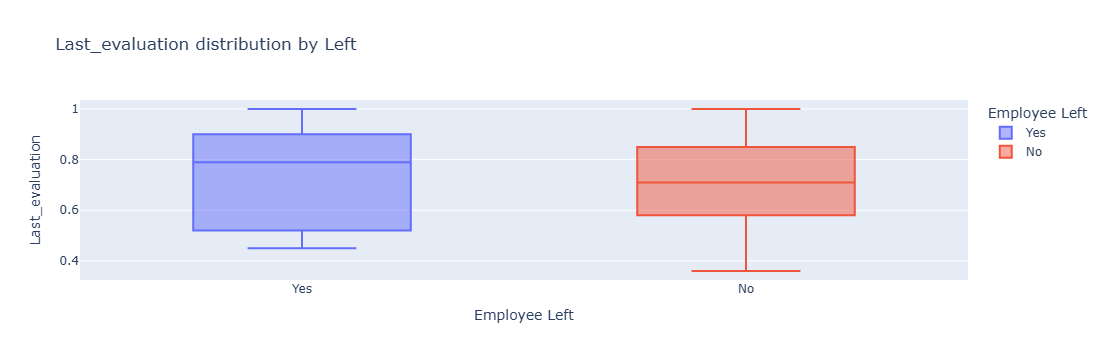

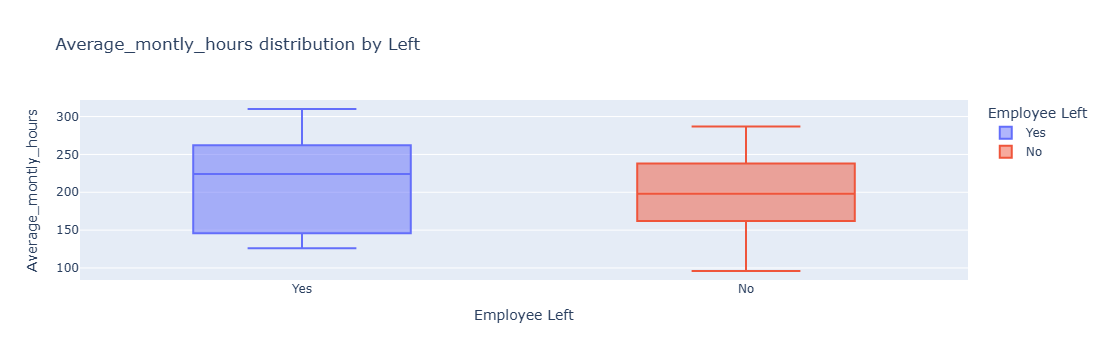

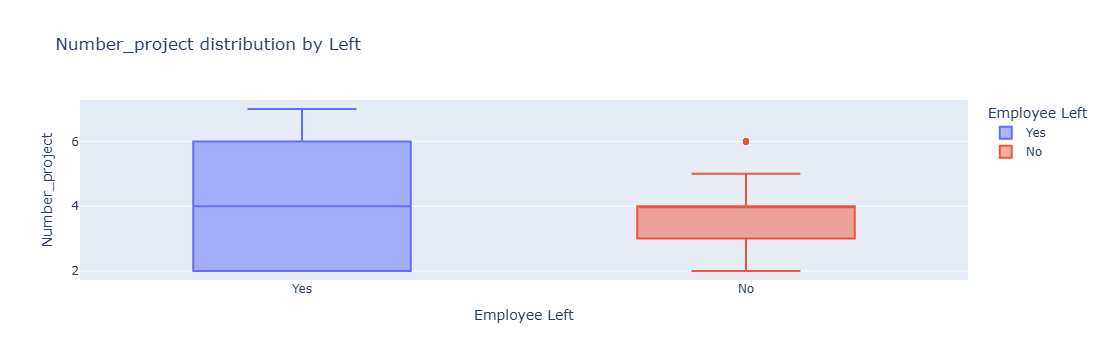

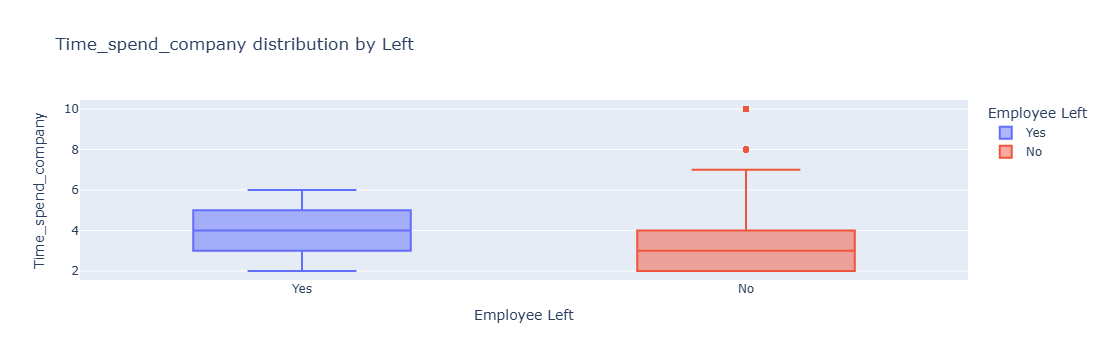

In [84]:
for col in numeric_cols:
    fig = px.box(Df1, x='Left', y=col, color='Left',
                 title=f"{col} distribution by Left",
                 labels={'Left': 'Employee Left'})
    fig.show()

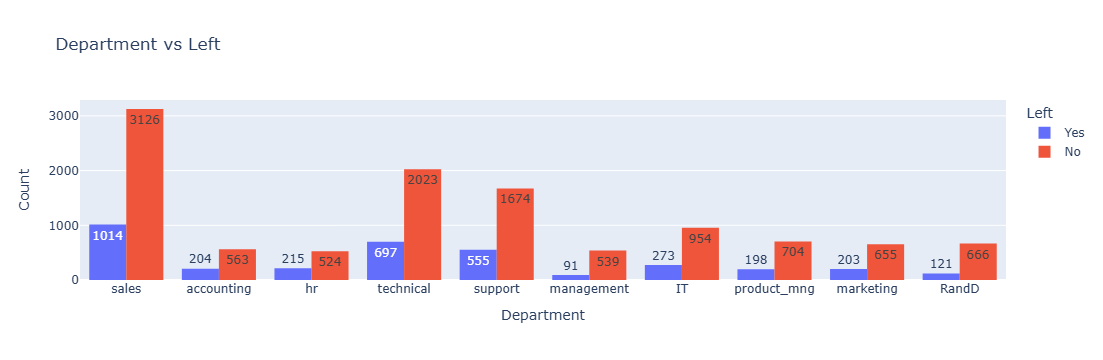

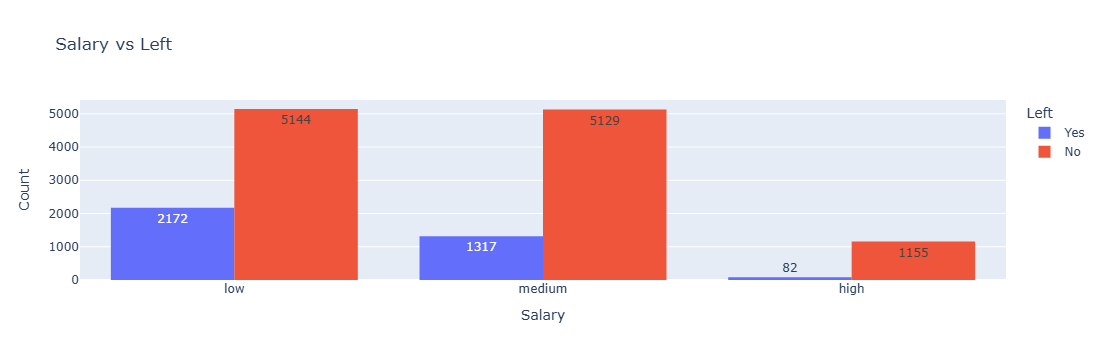

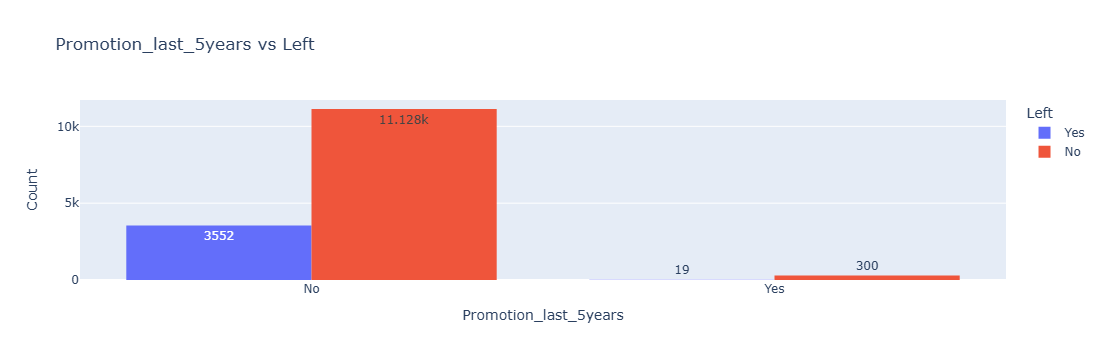

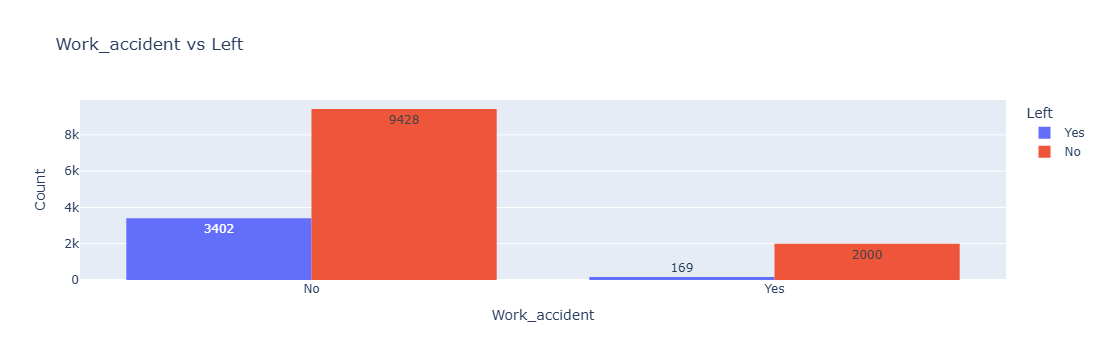

In [86]:
cat_pairs = [('Department', 'Left'), ('Salary', 'Left'), 
             ('Promotion_last_5years', 'Left'), ('Work_accident', 'Left')]

for x_col, color_col in cat_pairs:
    fig = px.histogram(Df1, x=x_col, color=color_col, barmode='group',
                       title=f"{x_col} vs {color_col}",
                       text_auto=True)
    fig.update_layout(xaxis_title=x_col, yaxis_title='Count')
    fig.show()